In [1]:
import group_data as gd
import flylib
import numpy as np

In [4]:
import os
os.remove('epoch_db_nnls_fits_bk_sub_F.hdf5')

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


### Join the signal mxtrxs by stacking all epochs. Create vectors to describe each trial type. (epoch db)

In [4]:
######
## No blur dF/F data
######

trial_numbers = list()
trial_names = list()
fly_numbers = list()
signal_units = list()
signal_data = list()
signal_names = list()
swarm_names = list()
trial_times = list()
exp_names = list()
genotypes = list()
flt_samples = list()

for swarm_name,swarm in gd.swarms.items():
    for fly in swarm.flies:
        try:
            sigs = fly.get_pkl_data('nnls_fits_no_bk_dF_F_sig_mtrx.cpkl')
            for i,trial in enumerate(sigs['StimCond']):
                for key in ['StimCond','wb_frequency',
                            'Ph0','Ph1','Ph2','Xpos','Ypos',
                            'b1','b2','b3',
                            'i1','i2',
                            'iii1','iii3','iii24',
                            'hg1','hg2','hg3','hg4',
                            'tpd','tpv','ttm','pr']:
                    try:
                        sd = np.array(sigs[key][i])
                        tna = sigs['trial_cond'][i]
                        tnum = i
                        fnum = fly.fly_num
                        snam = key
                        swna = swarm_name
                        trti = sigs['trial_time'][i]
                        expna = str(fly.list_expmnts()[0])
                        geno = fly.get_genotype()
                        fsmp = np.nansum(sigs['wb_frequency'][i] > 50)
                        
                        trial_names.append(tna)
                        trial_numbers.append(tnum)
                        fly_numbers.append(fnum)
                        signal_names.append(snam)
                        swarm_names.append(swna)
                        trial_times.append(trti)
                        exp_names.append(expna)
                        signal_data.append(sd)
                        genotypes.append(geno)
                        flt_samples.append(fsmp)
                        
                    except KeyError as err:
                        print err
                        print 'key error'
        except IOError:
            print fly.fly_num
            print swarm_name
            print 'missing file'
                #print 'missing: %s'%key
        except EOFError:
            print 'eof error' + str(fly.fly_num)
            
trial_numbers = np.array(trial_numbers)
trial_names = np.array(trial_names)
fly_numbers = np.array(fly_numbers)
signal_units = np.array(signal_units)
signal_data = np.array(signal_data)
signal_names = np.array(signal_names)
swarm_names = np.array(swarm_names)
trial_times = np.array(trial_times)
exp_names = np.array(exp_names)
genotypes = np.array(genotypes)
flt_samples = np.array(flt_samples)

import os
os.remove('epoch_db.hdf5')
import h5py
epoch_db = h5py.File('epoch_db.hdf5','a')
epoch_db.create_dataset('trial_numbers',data = trial_numbers,  compression="gzip",compression_opts=5)
epoch_db.create_dataset('trial_names',  data = trial_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('fly_numbers',  data = fly_numbers,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('signal_data',  data = signal_data,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('signal_names', data = signal_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('swarm_names',  data = swarm_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('trial_times',  data = trial_times,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('exp_names',    data = exp_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('genotypes',    data = genotypes,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('flt_samples',  data = flt_samples,  compression="gzip",compression_opts=5)
epoch_db.flush()
epoch_db.close()


370
GMR22H05_GFP
missing file
371
GMR22H05_GFP
missing file
372
GMR22H05_GFP
missing file
373
GMR22H05_GFP
missing file
380
GMR22H05_GFP
missing file
381
GMR22H05_GFP
missing file
382
GMR22H05_GFP
missing file
383
GMR22H05_GFP
missing file
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2'
key error
'hg4'
key error
'tpd'
key error
'tpv'
key error
'iii24'
key error
'hg2

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: invalid value encountered in greater


In [5]:
#blurred background subtracted data
trial_numbers = list()
trial_names = list()
fly_numbers = list()
signal_units = list()
signal_data = list()
signal_names = list()
swarm_names = list()
trial_times = list()
exp_names = list()
genotypes = list()
flt_samples = list()

for swarm_name,swarm in gd.swarms.items():
    for fly in swarm.flies:
        try:
            sigs = fly.get_pkl_data('nnls_fits_bk_sub_F_sig_mtrx.cpkl')
            for i,trial in enumerate(sigs['StimCond']):
                for key in ['StimCond','wb_frequency',
                            'Ph1','Ph2','Xpos','Ypos',
                            'b1','b2','b3',
                            'i1','i2',
                            'iii1','iii3','iii24',
                            'hg1','hg2','hg3','hg4',
                            'tpd','tpv','ttm','pr']:
                    try:
                        sd = np.array(sigs[key][i])
                        tna = sigs['trial_cond'][i]
                        tnum = i
                        fnum = fly.fly_num
                        snam = key
                        swna = swarm_name
                        trti = sigs['trial_time'][i]
                        expna = str(fly.list_expmnts()[0])
                        geno = fly.get_genotype()
                        fsmp = np.nansum(sigs['wb_frequency'][i] > 50)
                        
                        trial_names.append(tna)
                        trial_numbers.append(tnum)
                        fly_numbers.append(fnum)
                        signal_names.append(snam)
                        swarm_names.append(swna)
                        trial_times.append(trti)
                        exp_names.append(expna)
                        signal_data.append(sd)
                        genotypes.append(geno)
                        flt_samples.append(fsmp)
                        
                    except KeyError as err:
                        print err
                        print 'key error'
        except IOError:
            print fly.fly_num
            print swarm_name
            print 'missing file'
                #print 'missing: %s'%key
        except EOFError:
            print 'eof error' + str(fly.fly_num)
            
trial_numbers = np.array(trial_numbers)
trial_names = np.array(trial_names)
fly_numbers = np.array(fly_numbers)
signal_units = np.array(signal_units)
signal_data = np.array(signal_data)
signal_names = np.array(signal_names)
swarm_names = np.array(swarm_names)
trial_times = np.array(trial_times)
exp_names = np.array(exp_names)
genotypes = np.array(genotypes)
flt_samples = np.array(flt_samples)
#import os
#os.remove('epoch_db_nnls_fits_bk_sub_F.hdf5')
import h5py
epoch_db = h5py.File('epoch_db_nnls_fits_bk_sub_F.hdf5','a')
epoch_db.create_dataset('trial_numbers',data = trial_numbers,  compression="gzip",compression_opts=5)
epoch_db.create_dataset('trial_names',  data = trial_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('fly_numbers',  data = fly_numbers,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('signal_data',  data = signal_data,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('signal_names', data = signal_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('swarm_names',  data = swarm_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('trial_times',  data = trial_times,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('exp_names',    data = exp_names,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('genotypes',    data = genotypes,    compression="gzip",compression_opts=5)
epoch_db.create_dataset('flt_samples',  data = flt_samples,  compression="gzip",compression_opts=5)
epoch_db.flush()
epoch_db.close()

370
GMR22H05_GFP
missing file
371
GMR22H05_GFP
missing file
372
GMR22H05_GFP
missing file
373
GMR22H05_GFP
missing file
380
GMR22H05_GFP
missing file
381
GMR22H05_GFP
missing file
382
GMR22H05_GFP
missing file
383
GMR22H05_GFP
missing file
337
GMR31E10
missing file
338
GMR31E10
missing file
339
GMR31E10
missing file
340
GMR31E10
missing file
341
GMR31E10
missing file
342
GMR31E10
missing file
343
GMR31E10
missing file
344
GMR31E10
missing file
345
GMR31E10
missing file
346
GMR31E10
missing file
347
GMR31E10
missing file
348
GMR31E10
missing file
458
GMR31E10
missing file
459
GMR31E10
missing file
460
GMR31E10
missing file
438
GMR75B06_GFP
missing file
439
GMR75B06_GFP
missing file
440
GMR75B06_GFP
missing file
441
GMR75B06_GFP
missing file
444
GMR75B06_GFP
missing file
445
GMR75B06_GFP
missing file
446
GMR75B06_GFP
missing file
447
GMR75B06_GFP
missing file
366
GMR29E05_GFP
missing file
367
GMR29E05_GFP
missing file
368
GMR29E05_GFP
missing file
369
GMR29E05_GFP
missing file
376
GMR29E

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: invalid value encountered in greater


### Join the signal mxtrxs by stacking the data for each muscle type. Create vectors to indicate fly num, trial time, trial type ect.. (trial db)

In [43]:
data_dict = dict()
#collumns of data
for key in ['StimCond','wb_frequency',
            'Ph1','Ph2','Xpos','Ypos',
            'b1','b2','b3',
            'i1','i2',
            'iii1','iii3','iii24',
            'hg1','hg2','hg3','hg4',
            'tpd','tpv','ttm','pr']:
    data_dict[key] = list()

data_dict['trial_numbers'] = list()
data_dict['trial_names'] = list()
data_dict['fly_numbers'] = list()
data_dict['signal_units'] = list()
#signal_names = list()
data_dict['swarm_names'] = list()
data_dict['trial_times'] = list()
data_dict['exp_names'] = list()
data_dict['genotypes'] = list()
#data_dict['flt_samples = list()

In [44]:
xi = np.linspace(0,23,1150)
for swarm_name,swarm in gd.swarms.items():
    for fly in swarm.flies:
        try:
            sigs = fly.get_pkl_data('nnls_fits_no_bk_dF_F_sig_mtrx.cpkl')
            for i,trial in enumerate(sigs['StimCond']):
                for key in ['StimCond','wb_frequency',
                            'Ph1','Ph2','Xpos','Ypos',
                            'b1','b2','b3',
                            'i1','i2',
                            'iii1','iii3','iii24',
                            'hg1','hg2','hg3','hg4',
                            'tpd','tpv','ttm','pr']:
                    try:
                        signal = np.array(sigs[key][i])
                    except KeyError:
                        signal = np.empty_like(xi)
                        signal[:] = np.NAN
                    data_dict[key].append(signal)
                try:
                    tna = sigs['trial_cond'][i]
                except KeyError:
                    tna = 'nan'
                try:
                    trti = sigs['trial_time'][i]
                except KeyError:
                    trti = np.NAN
                tnum = i
                fnum = fly.fly_num
                swna = swarm_name

                expna = str(fly.list_expmnts()[0])
                try:
                    geno = fly.get_genotype()
                except Exception as er:
                    #print er
                    geno = 'nan'
                data_dict['trial_numbers'].append(tnum)
                data_dict['trial_names'].append(tna)
                data_dict['fly_numbers'].append(fnum)
                data_dict['swarm_names'].append(swarm_name)
                data_dict['trial_times'].append(tna)
                data_dict['exp_names'].append(expna)
                data_dict['genotypes'].append(geno)
        except IOError:
            print fly.fly_num
            print swarm_name
            print 'missing file'
                #print 'missing: %s'%key
        except EOFError:
            print 'eof error' + str(fly.fly_num)

499
GMR22H05_prc
missing file
500
GMR22H05_prc
missing file
501
GMR22H05_prc
missing file
502
GMR22H05_prc
missing file
503
GMR39E01_GFP
missing file
504
GMR39E01_GFP
missing file
505
GMR39E01_GFP
missing file
506
GMR39E01_GFP
missing file


In [45]:
import os
#os.listdir('./')
os.remove('trial_db.hdf5')

In [46]:
import h5py
trial_db = h5py.File('trial_db.hdf5','a')

In [47]:
for key in data_dict:
    trial_db.create_dataset(key,data = np.array(data_dict[key]),  compression="gzip",compression_opts=5)

In [48]:
trial_db.flush()

### Calculate the cross covariance data for each signal type and add it to the trial_db

In [2]:
#fit to each fly in serial (block) but break up the data to run in parallel within a fly.
from IPython.parallel import Client
clients = Client() 
clients.block = True
print clients.ids
v = clients[:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [53]:
#amplitude
import h5py
trial_db = h5py.File('trial_db.hdf5','a')

muscle_list =  ['b1','b2','b3',
                'i1','i2',
                'iii1','iii3','iii24',
                'hg1','hg2','hg3','hg4',
                'tpd','tpv','ttm','pr']
from scipy.signal import correlate
from scipy.signal import detrend
corr_dict = dict()

for mname in muscle_list:
    sarray1 = np.array(trial_db[mname])
    sarray2 = np.array(trial_db['Ph1'])
    xdata = [detrend(a1[isfinite(a1)]) for a1 in sarray1]
    ydata = [detrend(a1[isfinite(a1)]) for a1 in sarray2]
    corrlist = v.map(correlate,xdata,ydata,['same']*len(xdata))
    corrmtrx = np.empty((len(corrlist),1149))
    corrmtrx[:] = np.nan
    for i,cd in enumerate(corrlist):
        if shape(cd)[0] > 1147:
            corrmtrx[i,:1147] = cd[:1147]
        else:
            pass
    corr_dict[mname] = corrmtrx
for key in corr_dict:
    trial_db.create_dataset('xcov_amp' + key,data = np.array(corr_dict[key]),  compression="gzip",compression_opts=5)
trial_db.flush()

In [6]:
#frequency
import h5py
import numpy as np
trial_db = h5py.File('trial_db.hdf5','a')

muscle_list =  ['b1','b2','b3',
                'i1','i2',
                'iii1','iii3','iii24',
                'hg1','hg2','hg3','hg4',
                'tpd','tpv','ttm','pr']
from scipy.signal import correlate
from scipy.signal import detrend
corr_dict = dict()

for mname in muscle_list:
    sarray1 = np.array(trial_db[mname])
    sarray2 = np.array(trial_db['wb_frequency'])
    xdata = [detrend(a1[isfinite(a1)]) for a1 in sarray1]
    ydata = [detrend(a1[isfinite(a1)]) for a1 in sarray2]
    corrlist = v.map(correlate,xdata,ydata,['same']*len(xdata))
    corrmtrx = np.empty((len(corrlist),1149))
    corrmtrx[:] = np.nan
    for i,cd in enumerate(corrlist):
        if shape(cd)[0] > 1147:
            corrmtrx[i,:1147] = cd[:1147]
        else:
            pass
    corr_dict[mname] = corrmtrx
for key in corr_dict:
    trial_db.create_dataset('xcov_freq' + key,data = np.array(corr_dict[key]),  compression="gzip",compression_opts=5)
trial_db.flush()

/home/psilentp/anaconda/lib/python2.7/site-packages/scipy/signal/signaltools.py:1734: RuntimeWarning: divide by zero encountered in long_scalars
  (N, prod(dshape, axis=0) // N))


CompositeError: one or more exceptions from call to method: correlate
[8:apply]: ValueError: could not broadcast input array from shape (857) into shape (856)

In [7]:
shape(sarray1)

(13371, 1150)

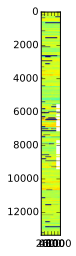

In [14]:
imshow(sarray2)